In [12]:
from sklearn import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Support Vector Machines (SVM) are a powerful machine learning toolkit for classification and regression problems. We will explore their capabilities using the OpenML dataset about forged banknotes (https://www.openml.org/d/1462).

## Import the dataset from OpenML by using the respective scikit-learn methods.
## Visualize the features by converting them to a two-dimensional format with the help of t-SNE. Does this dataset appear to be suitable for linear SVM classification?

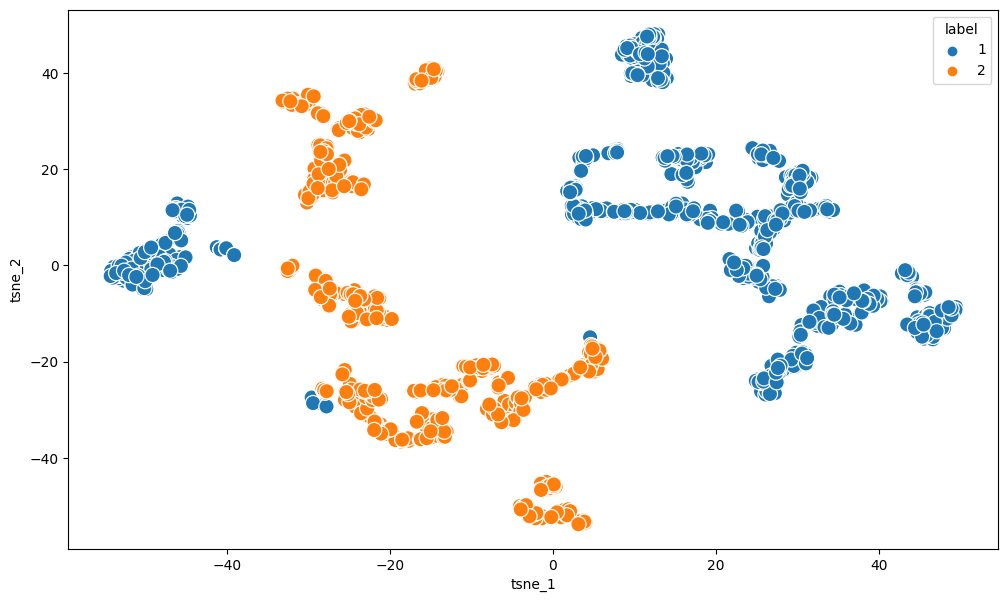

In [13]:
banknotes = sklearn.datasets.fetch_openml(name='banknote-authentication')
data = banknotes['data']
labels = banknotes['target']
var_names = banknotes['feature_names']
target_names = banknotes['target_names']

view = sklearn.manifold.TSNE(n_components=2, random_state=1).fit_transform(data)

tsne_result_df = pd.DataFrame({'tsne_1': view[:,0], 'tsne_2': view[:,1], 'label': labels})
fig, ax = plt.subplots(1, figsize=(12, 7))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax, s=120)
plt.show()

Data does not appear to be suitable for linear SVM

## Split the data into a training set and a test set with a test ratio of 0.2

In [5]:
df = pd.DataFrame(data, columns=var_names)
df['label'] = labels

data_X = df.drop('label', axis=1)
data_y = df['label']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data_X, data_y, test_size=0.2, random_state=1)

## Scale the features by using one of the feature scalers from scikit-learn. Which one did you choose and why?
## Train a linear SVM classifier with the hyperparameter C=1, max_iter=10000, and hinge loss

I set up two piplines to compare scores between MinMax and standard scaler

In [6]:
pipeline1 = sklearn.pipeline.Pipeline([
    ("Scaling", sklearn.preprocessing.StandardScaler()),
    ("Linear SVM", sklearn.svm.LinearSVC(C=1.0, max_iter=1000, loss='hinge'))
])


pipeline2 = sklearn.pipeline.Pipeline([
    ("Scaling", sklearn.preprocessing.MinMaxScaler()),
    ("Linear SVM", sklearn.svm.LinearSVC(C=1.0, max_iter=1000, loss='hinge'))
])

pipeline1.fit(X_train, y_train)
pipeline2.fit(X_train, y_train)

Y_pred1 = pipeline1.predict(X_test)
Y_pred2 = pipeline2.predict(X_test)

print('Standard scaler Mean Absolute Error: ', sklearn.metrics.mean_absolute_error(Y_pred1, y_test))
print('Standard scaler Score', pipeline1.score(X_test, y_test))

print('MinMax scaler Mean Absolute Error: ', sklearn.metrics.mean_absolute_error(Y_pred2, y_test))
print('MinMax scaler Score', pipeline2.score(X_test, y_test))

Standard scaler Mean Absolute Error:  0.01818181818181818
Standard scaler Score 0.9818181818181818
MinMax scaler Mean Absolute Error:  0.025454545454545455
MinMax scaler Score 0.9745454545454545


Standard scaler has better score so I chose it

## What is the performance of this classifier on the test set regarding accuracy and the confusion matrix? Also compare it to the performance on the training set. Is overfitting or underfitting a problem?

In [7]:
sc = sklearn.preprocessing.StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

svm = sklearn.svm.LinearSVC(C=1.0, max_iter=1000, loss='hinge')

svm.fit(X_train_std, y_train)


test_pred = svm.predict(X_test_std)
train_pred = svm.predict(X_train_std)


print('Accuracy for training set:', sklearn.metrics.accuracy_score(y_train, train_pred))
print('Confusion Matrix for training set:\n', sklearn.metrics.confusion_matrix(y_train, train_pred))

print('Accuracy for test set:', sklearn.metrics.accuracy_score(y_test, test_pred))
print('Confusion Matrix for test set:\n', sklearn.metrics.confusion_matrix(y_test, test_pred))

Accuracy for training set: 0.9854147675478578
Confusion Matrix for training set:
 [[589  16]
 [  0 492]]
Accuracy for test set: 0.9818181818181818
Confusion Matrix for test set:
 [[153   4]
 [  1 117]]


Accuracy is very high 0.98 so the the classifier performs very well.
There appears to be no overfitting or underfitting since training set accuracy is not that much higher than test set accuracy.

We will now look at non-linear SVMs that are capable of fitting more complex data. We use the breast cancer dataset (https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset) for this.

## Fetch the dataset. Split it up into a training set and a test set with a test ratio of 0.2.

In [8]:
cancer = sklearn.datasets.load_breast_cancer()

df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer['label'] = cancer.target

cancer_X = df_cancer.drop('label', axis=1)
cancer_y = df_cancer['label']

cancer_X_train, cancer_X_test, cancer_y_train, cancer_y_test = sklearn.model_selection.train_test_split(cancer_X, cancer_y, test_size=0.2, random_state=1)

## Build three scikit-learn pipelines (see below) that do the following:
## --- 1. Scale the features by using one of the feature scalers from scikit-learn. Which one did you choose and why?
## --- 2. Train an SVM classifier on the training data.

Choosing the scaler:

In [9]:
pipeline1 = sklearn.pipeline.Pipeline([
    ("Scaling", sklearn.preprocessing.StandardScaler()),
    ("SVM", sklearn.svm.SVC(C = 1.0, kernel = 'poly', degree = 3, coef0 = 1, max_iter=1000))
])


pipeline2 = sklearn.pipeline.Pipeline([
    ("Scaling", sklearn.preprocessing.MinMaxScaler()),
    ("SVM", sklearn.svm.SVC(C = 1.0, kernel = 'poly', degree = 3, coef0 = 1, max_iter=1000))
])

pipeline1.fit(cancer_X_train, cancer_y_train)
pipeline2.fit(cancer_X_train, cancer_y_train)

Y_pred1 = pipeline1.predict(cancer_X_test)
Y_pred2 = pipeline2.predict(cancer_X_test)

print('Standard scaler Mean Absolute Error: ', sklearn.metrics.mean_absolute_error(Y_pred1, cancer_y_test))
print('Standard scaler Score', pipeline1.score(cancer_X_test, cancer_y_test))

print('MinMax scaler Mean Absolute Error: ', sklearn.metrics.mean_absolute_error(Y_pred2, cancer_y_test))
print('MinMax scaler Score', pipeline2.score(cancer_X_test, cancer_y_test))

Standard scaler Mean Absolute Error:  0.03508771929824561
Standard scaler Score 0.9649122807017544
MinMax scaler Mean Absolute Error:  0.02631578947368421
MinMax scaler Score 0.9736842105263158


Here MinMax scaler performs better.

## Pipeline 1: A linear SVM classifier with C=1, max_iter=1000, and a hinge loss that acts as a baseline.
## Pipeline 2: A linear SVM classifier with the same parameter settings as Pipeline 1. In contrast to the first one, this classifier should work on polynomial features up to a degree of 3.
## Pipeline 3: An SVM classifier with a polynomial kernel (degree of 3), C=1, and coef0=1.

In [14]:
pipeline1 = sklearn.pipeline.Pipeline([
    ("Scaling", sklearn.preprocessing.MinMaxScaler()),
    ("Linear SVM", sklearn.svm.LinearSVC(C = 1.0, max_iter=1000, loss = 'hinge'))
])


pipeline2 = sklearn.pipeline.Pipeline([
    ("Scaling", sklearn.preprocessing.MinMaxScaler()),
    ("Preprocessor", sklearn.preprocessing.PolynomialFeatures(degree=3)),
    ("Linear SVM", sklearn.svm.LinearSVC(C = 1.0, max_iter=1000, loss ='hinge'))
])

pipeline3 = sklearn.pipeline.Pipeline([
    ("Scaling", sklearn.preprocessing.MinMaxScaler()),
    ("SVM with polynomial kernel", sklearn.svm.SVC(C = 1.0, kernel = 'poly', degree = 3, coef0 = 1, max_iter=1000))
])

pipeline1.fit(cancer_X_train, cancer_y_train)
pipeline2.fit(cancer_X_train, cancer_y_train)
pipeline3.fit(cancer_X_train, cancer_y_train)

Y_pred1 = pipeline1.predict(cancer_X_test)
Y_pred2 = pipeline2.predict(cancer_X_test)
Y_pred3 = pipeline3.predict(cancer_X_test)

print('Pipeline 1 Accuracy: ', sklearn.metrics.accuracy_score(Y_pred1, cancer_y_test))

print('Pipeline 2 Accuracy: ', sklearn.metrics.accuracy_score(Y_pred2, cancer_y_test))

print('Pipeline 3 Accuracy: ', sklearn.metrics.accuracy_score(Y_pred3, cancer_y_test))

Pipeline 1 Accuracy:  0.9649122807017544
Pipeline 2 Accuracy:  0.9736842105263158
Pipeline 3 Accuracy:  0.9736842105263158


Pipelines 2 and 3 are the same and the best ones, pipeline 1 is a little worse, which tells us that polynomial kernel fits the data better than linear SVM.

## Try to improve the results by performing a grid search with the best performing classifier. Keep the configuration that was used before and search for better parameter settings of C (range between 0.1 and 100) and max_iter (range between 100 and 10000). Use appropriate steps in the grid.

In [15]:
sc = sklearn.preprocessing.MinMaxScaler()
sc.fit(cancer_X_train)
cancer_X_train_std = sc.transform(cancer_X_train)
cancer_X_test_std = sc.transform(cancer_X_test)

param_grid = {'C': [0.1, 1, 10, 100],
              'max_iter': [100, 750, 2000, 7000, 10000]}

grid = sklearn.model_selection.GridSearchCV(sklearn.svm.SVC(kernel='poly', degree=3, coef0=1), param_grid, refit=True)

grid.fit(cancer_X_train_std, cancer_y_train)
print(grid.best_params_)
print(grid.best_estimator_)

grid_predictions = grid.predict(cancer_X_test_std)

print('Accuracy after grid for SVM', sklearn.metrics.accuracy_score(cancer_y_test, grid_predictions))

{'C': 0.1, 'max_iter': 100}
SVC(C=0.1, coef0=1, kernel='poly', max_iter=100)
Accuracy after grid for SVM 0.9736842105263158
